In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
GOOGLE_COLAB = True

In [0]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [7]:
import importlib
importlib.reload(data)
importlib.reload(features)
importlib.reload(metrics)
importlib.reload(visualization)
importlib.reload(models)

<module 'yelpsent.models' from 'drive/My Drive/yelp_sentiment_analysis/yelpsent/models/__init__.py'>

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- 270k training data, 90k testing data
- Imbalanced class ratios: 18%, 20%, 62%

In [11]:
data_train['sentiment'].value_counts()

2    169279
0     53709
1     48927
Name: sentiment, dtype: int64

In [12]:
data_train['sentiment'].value_counts() / len(data_train)

2    0.622544
0    0.197521
1    0.179935
Name: sentiment, dtype: float64

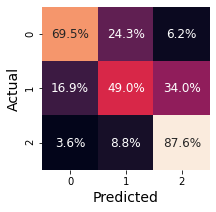

In [13]:
pipeline, y_train_pred, y_test_pred, f1_train, f1_test = models.train_and_test(X_train=X_train,
                                                                               y_train=y_train,
                                                                               X_test=X_test,
                                                                               y_test=y_test,
                                                                               vectorizer=CountVectorizer(),
                                                                               classifier=MultinomialNB())

In [14]:
print("Macro F1 Scores: \n Training: {0} \n Testing: {1}".format(f1_train, f1_test))

Macro F1 Scores: 
 Training: 0.7208982957252751 
 Testing: 0.6879975472560068


# 1 - Training Data Size

***Test - Training Data Size = 1000***


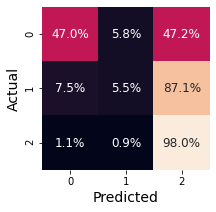

Macro F1 Scores: 
 Training: 0.931 
 Testing: 0.559


***Test - Training Data Size = 5000***


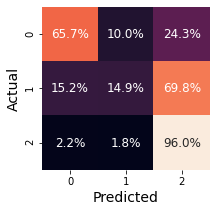

Macro F1 Scores: 
 Training: 0.850 
 Testing: 0.625


***Test - Training Data Size = 10000***


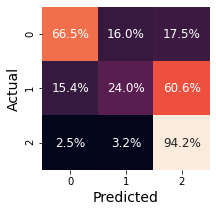

Macro F1 Scores: 
 Training: 0.833 
 Testing: 0.641


***Test - Training Data Size = 50000***


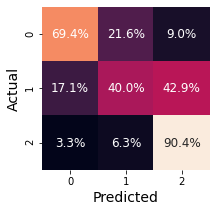

Macro F1 Scores: 
 Training: 0.755 
 Testing: 0.675


***Test - Training Data Size = 100000***


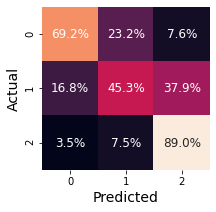

Macro F1 Scores: 
 Training: 0.738 
 Testing: 0.683


***Test - Training Data Size = 150000***


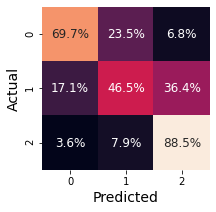

Macro F1 Scores: 
 Training: 0.731 
 Testing: 0.685


***Test - Training Data Size = 250000***


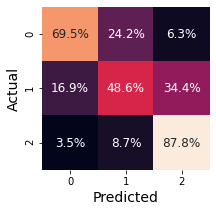

Macro F1 Scores: 
 Training: 0.722 
 Testing: 0.688




In [15]:
for k in [1*10**3, 5*10**3, 10*10**3, 50*10**3, 100*10**3, 150*10**3, 250*10**3]:
  print("***Test - Training Data Size = {k}***".format(k=k))
  data_train_sample = data.sample_dataset(data=data_train,
                                          k=k,
                                          balance=False)
  X_train_sample = data_train_sample['review'].tolist()
  y_train_sample = data_train_sample['sentiment'].tolist()
  _, _, _, f1_train, f1_test = models.train_and_test(X_train=X_train_sample,
                                                     y_train=y_train_sample,
                                                     X_test=X_test,
                                                     y_test=y_test,
                                                     vectorizer=CountVectorizer(),
                                                     classifier=MultinomialNB())
  print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))

# 2 - Class Ratio

***Test - Class Ratio Balance = False***


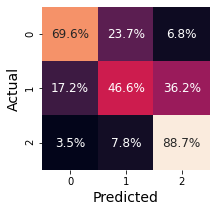

Macro F1 Scores: 
 Training: 0.733 
 Testing: 0.686


***Test - Class Ratio Balance = True***


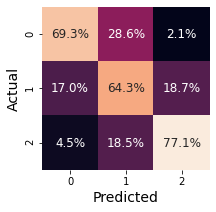

Macro F1 Scores: 
 Training: 0.746 
 Testing: 0.689




In [16]:
for balance in [False, True]:
  print("***Test - Class Ratio Balance = {balance}***".format(balance=balance))
  data_train_sample = data.sample_dataset(data=data_train,
                                          k=45000*3,
                                          balance=balance)
  X_train_sample = data_train_sample['review'].tolist()
  y_train_sample = data_train_sample['sentiment'].tolist()
  _, _, _, f1_train, f1_test = models.train_and_test(X_train=X_train_sample,
                                                     y_train=y_train_sample,
                                                     X_test=X_test,
                                                     y_test=y_test,
                                                     vectorizer=CountVectorizer(),
                                                     classifier=MultinomialNB())
  print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))

# Conclusion

We should use down-sampled balanced training set

In [0]:
data_train_balanced = data.sample_dataset(data=data_train,
                                          k=45000*3,
                                          balance=True)

In [18]:
data_train_balanced.head()

,review,sentiment
0,"May 9, 2015, Party of six with reservations fo...",0
1,There was nothing good to say. There I said it...,0
2,Went there with my friend. \n\nOrdered veal ta...,0
3,Service 2/5 - waiter forgot drinks and did rev...,0
4,Not great!! We were expecting a phenomenal bu...,0


In [19]:
data_train_balanced['sentiment'].value_counts()

2    45000
1    45000
0    45000
Name: sentiment, dtype: int64

In [0]:
data_train_balanced.to_json('drive/My Drive/yelp_sentiment_analysis/data/yelp_train_balanced.json', orient='records')